In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
# Decision Tree Entropy
def decisionTreeEntropy(i,y_test,x_test):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
    clf = clf.fit(X_train,y_train)

    scores_a = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    a = mean(absolute(scores_a))

    scores_p = cross_val_score(clf, X, y, scoring='precision', cv=cv, n_jobs=-1)
    p = mean(absolute(scores_p))

    scores_r = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1)
    r = mean(absolute(scores_r))

    scores_f1 = cross_val_score(clf, X, y, scoring='f1', cv=cv, n_jobs=-1)
    f1 = mean(absolute(scores_f1))
    
    y_pred = clf.predict_proba(x_test)[:, 1]
    auc = metrics.roc_auc_score(y_test, y_pred)

    feature_cols = list(X.columns) 
    target_cols = ['0','1']

    ## Probabilty errechnen
    
    # #t = df[:5]
    # x_t = t[feature_cols]
    # y_t = t.y

    pred = clf.predict(x_test)
    probs = clf.predict_proba(x_test)

    # print(pred)
    # print(probs)



    # fig = plt.figure(figsize=(43,30))
    # _ = tree.plot_tree(clf, 
    #                 feature_names=feature_cols,  
    #                 class_names=target_cols,
    #                 filled=True,
    #                 fontsize=10)

    # nr = str(i)
    # fig.savefig("decistion_tree_"+nr+".png")

    # text_representation = tree.export_text(clf)
    # print(text_representation)
    
    return a,p,r,f1,auc,probs,clf

In [3]:
accuracyDTE= pd.DataFrame(columns=['Sentence', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
featureImportance= pd.DataFrame(columns=['Sentence', 'Feature', 'Score'])


n =  [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]
feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']
#
for i in n:
    path='matrices_allsessions/matrix'+str(i)+'.pkl'
    infile = open(path,'rb')
    df = pickle.load(infile)
    infile.close()
    df=df.reset_index()

    X = df[feature_cols]
    y = df.y
    y= y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    # X_test.to_pickle('X_test15.pkl')
    # y_test.to_pickle('y_test15.pkl')
    k = 5
    cv = KFold(n_splits=k, random_state=None)

    a,p,r,f1,auc,probs,clf = decisionTreeEntropy(i,y_test, X_test)
    accuracyDTE = accuracyDTE.append({'Sentence': i, 'Accuracy':a,'Precision': p, 'Recall':r, 'F1':f1, 'AUC':auc}, ignore_index=True)
    #prob_result = prob_result.append(probs)

    importance = clf.feature_importances_
    # summarize feature importance
    for p,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (p,v))
        featureImportance = featureImportance.append({'Sentence': i, 'Feature':p,'Score': v}, ignore_index=True)

#accuracyDTE.to_pickle('accuracyDTE.pkl')
featureImportance.to_pickle('featureImportanceDTE.pkl')

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.34020
Feature: 3, Score: 0.00131
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00029
Feature: 6, Score: 0.04681
Feature: 7, Score: 0.50438
Feature: 8, Score: 0.00345
Feature: 9, Score: 0.00102
Feature: 10, Score: 0.00015
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00023
Feature: 14, Score: 0.07195
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.03020
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 0, Score: 0.07645
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.38850
Feature: 3, Score: 0.00517
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.05781
Feature: 7, Score: 0.45604
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12,

            Score
             mean
Feature          
0.0      0.009585
1.0      0.001481
2.0      0.038481
3.0      0.005786
4.0      0.000290
5.0      0.000692
6.0      0.024442
7.0      0.808736
8.0      0.005839
9.0      0.000820
10.0     0.001656
11.0     0.000130
12.0     0.000178
13.0     0.010507
14.0     0.084369
15.0     0.004205
16.0     0.001518
17.0     0.000393
18.0     0.000149
19.0     0.000348
20.0     0.000105
21.0     0.000006
22.0     0.000287
23.0     0.000000


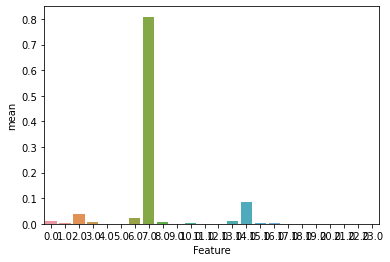

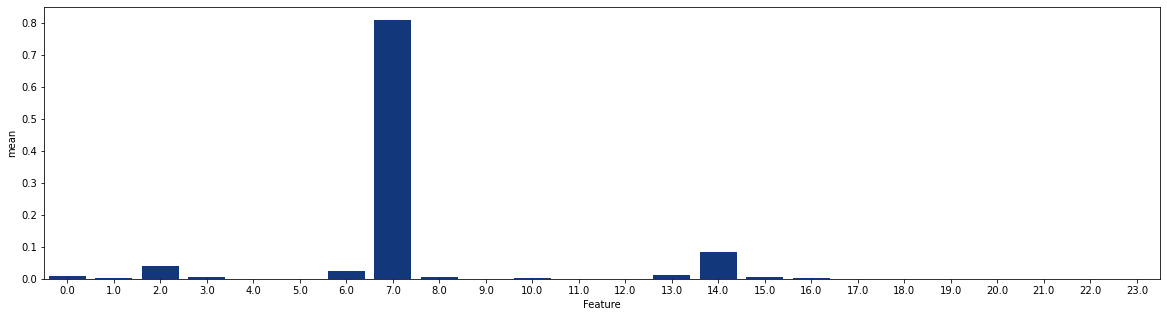

In [4]:
featureImportance_grouped = featureImportance.groupby('Feature').agg({'Score':['mean']})
print(featureImportance_grouped)
featureImportance_grouped.to_pickle('featureImportance_groupedDTE.pkl')
ax = sns.barplot(x=featureImportance_grouped.index, y=featureImportance_grouped.Score['mean'], data=featureImportance_grouped)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=featureImportance_grouped.index, y=featureImportance_grouped.Score['mean'], data=featureImportance_grouped, color='#00338d')

In [113]:
t = probs[:,:1].tolist()

data_df = pd.DataFrame(t)
data_df.to_pickle('DTE55.pkl')

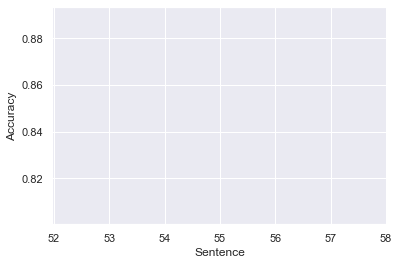

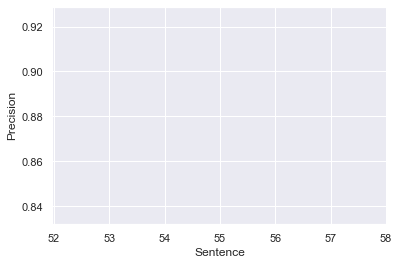

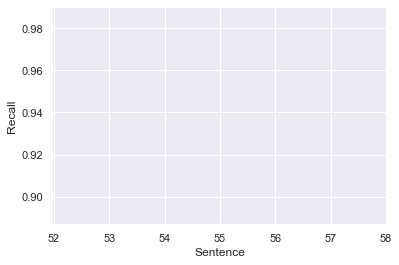

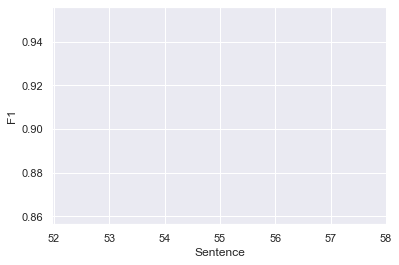

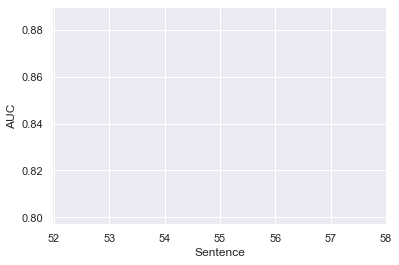

In [114]:
sns.set_theme()

sns.lineplot(data=accuracyDTE, x="Sentence", y="Accuracy")
plt.show()

sns.lineplot(data=accuracyDTE, x="Sentence", y="Precision")
plt.show()

sns.lineplot(data=accuracyDTE, x="Sentence", y="Recall")
plt.show()

sns.lineplot(data=accuracyDTE, x="Sentence", y="F1")
plt.show()

sns.lineplot(data=accuracyDTE, x="Sentence", y="AUC")
plt.show()